## 1. Import Libraries

In [2]:
import pandas as pd
import csv
import json
from collections import Counter

## 2. Load data

In [27]:
file1 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_10633.csv"
file2 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_10824_full.csv"
file3 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_12345_full.csv"
file4 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_26301.csv"
file5 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_33534.csv"
file6 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_38129.csv"
file7 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_50405_full.csv"
file8 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/Sec2Gr3_74721.csv"
file9 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/Sec2Gr3_77217.csv"
file10 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/Sec2Gr3_77777.csv"

## 3. Exploratory data analysis

In [28]:
# Lists that will store video IDs for each user's viewed posts
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []
list9 = []
list10 = []

In [5]:
# Lists that will store content creators for each user's viewed posts
user1author = []
user2author = []
user3author = []
user4author = []
user5author = []
user6author = []
user7author = []
user8author = []
user9author = []
user10author = []

In [167]:
# pyktok data
data = pd.read_csv(file6)
posts = pd.DataFrame(data)
posts = posts.drop_duplicates()
#posts.shape
#posts.head()

In [168]:
#clean the data
posts = posts[posts['video_description'].notna()]
posts = posts[posts['video_locationcreated'] == 'US']
posts.shape

(19, 20)

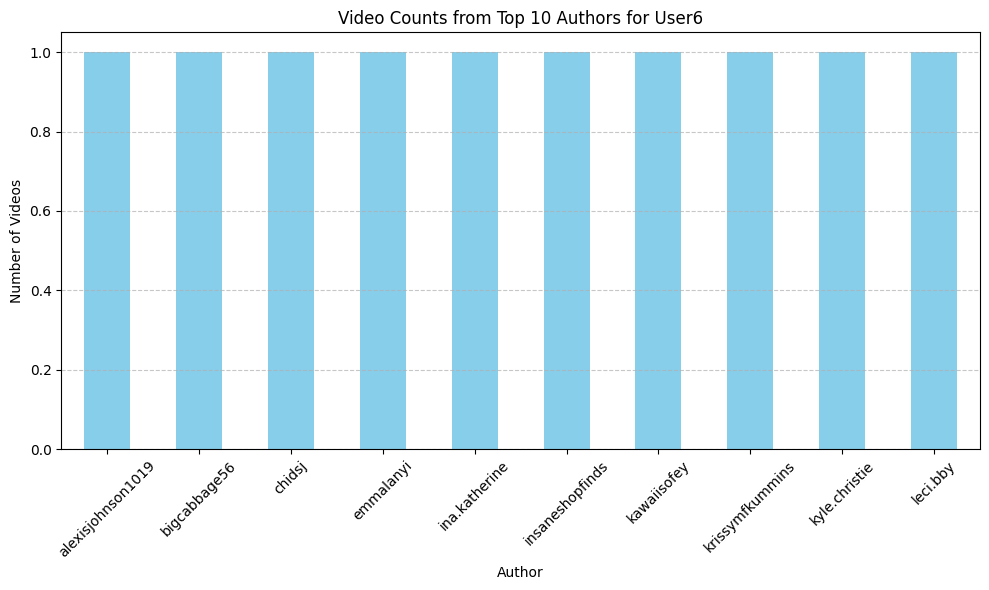

In [169]:
# Group by author and count the number of videos for each author
authorVideos = posts.groupby('author_username').size()

top_10 = authorVideos.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='skyblue')
plt.title('Video Counts from Top 10 Authors for User6')
plt.xlabel('Author')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [96]:
# storing the ids
for id in posts['video_id']:
    if id not in list1:
        list1.append(id)

#len(list10)

In [67]:
#storing authors
#for author in posts['author_username']:
 #   if author not in user9author:
  #      user9author.append(author)

#len(user9author)

In [68]:
# Combining all author lists to get the total unique authors
#allAuthors = user1author + user2author + user3author + user4author + user5author + user6author + user7author + user8author + user9author + user10author

# Count unique authors
#uniqAuthors = Counter(allAuthors)
#uniqAuthors.most_common(10)

In [69]:
#len(uniqAuthors)

In [101]:
# Combinng all lists to get total unique videos
idLists = [list1, list2, list3, list4, list5, list6, list7, list8, list9, list10]
unique_counts = []

for l in idLists:
    for video in l:
        if video not in unique_counts:
            unique_counts.append(video)

len(unique_counts)

52632

In [108]:
# Find overlaps between two lists
def find_overlaps(l1, l2):
    counter1 = Counter(l1)
    counter2 = Counter(l2)
    common = counter1 & counter2  # intersection of two counters
    return len(common)

# Loop over each pair of users and find overlaps
overlapDict = {}

for i in range(len(idLists)):
    for j in range(i + 1, len(idLists)):
        overlaps = find_overlaps(idLists[i], idLists[j])
        pair = (i, j)
        overlapDict[pair] = overlaps

#overlapDict = sorted(overlapDict.items(), key=lambda item: item[1], reverse=True)
#overlapDict

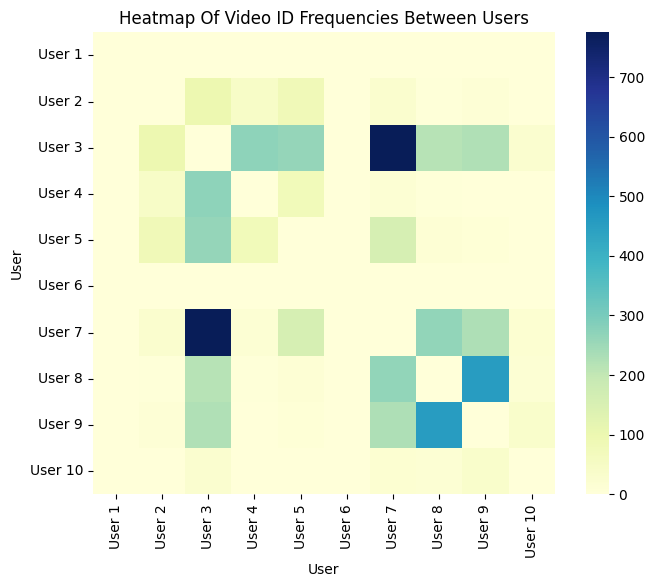

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Extract unique user IDs
users = set()
for pair in overlapDict.keys():
    users.update(pair)

# Create an empty matrix to store overlap counts
matrix_size = max(users) + 1
overlap_matrix = np.zeros((matrix_size, matrix_size))

# Fill the matrix with overlap counts
for pair, count in overlapDict.items():
    user1, user2 = pair
    overlap_matrix[user1, user2] = count
    overlap_matrix[user2, user1] = count  # symmetric matrix

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(overlap_matrix, cmap='YlGnBu', fmt='g', square=True, #annot=True displays the counts in the cells
            xticklabels=[f"User {i+1}" for i in range(matrix_size)], #cmap = viridis
            yticklabels=[f"User {i+1}" for i in range(matrix_size)])
plt.title('Heatmap Of Video ID Frequencies Between Users')
plt.xlabel('User')
plt.ylabel('User')
plt.show()

In [ ]:
#posts2 = posts.groupby('video_id').agg('count').reset_index()
#posts2.columns = ['video_id','count' ]
#posts2

In [ ]:
#dictCount = Counter(list5)
#len(dictCount)

## 4. Generate JSON files

In [168]:
# Combine video descriptions and suggested words into one flat list
sentences = sum(posts[['video_description', 'suggested_words']].values.tolist(), [])
len(sentences)

9042

In [162]:
#save to file
with open('user1.json', 'w') as fout:
    json.dump(sentences, fout)